In [215]:
%matplotlib notebook

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
import librosa
from tqdm.notebook import tqdm
from IPython.display import Audio
from pandas.api.types import is_numeric_dtype

TS_DATASET_FOLDER = os.path.join("..", "dataset")
TS_PREPROC_FOLDER = os.path.join(TS_DATASET_FOLDER, "preprocessed_traces")
DF_PREPROC_FILE = os.path.join(TS_PREPROC_FOLDER, "preproc_ts.df")

INTERESTING_TRACES = [ "syllables_02_sc", "std_phon_trace", 'spectral_centroid']
INTERESTING_TRACES += [f"syllables_{i}_ts" for i in range(7)]

## Save folder for long-run estimators
ESTIMATORS_FOLDER = os.path.join("..", "estimators")
# matplotlib.rcParams['figure.figsize'] = (10, 5)

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import default_style

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import

In [7]:
df = pd.read_csv(DF_PREPROC_FILE)
df.drop(columns=["fourier_coeffs", "path", "filtered_fourier_coeffs"], inplace=True)

categorical_attributes = [col for col in df.columns if not is_numeric_dtype(df[col])]


traces = dict()
for t in INTERESTING_TRACES:
    traces[t] = np.load(os.path.join(TS_PREPROC_FOLDER, f"{t}.npy"), allow_pickle=True)

# traces["syll_labels"] = np.repeat(np.arange(7), len(traces["syllables_fourier"])//7)

# print(traces["syll_labels"].shape)

## Metrics

In [8]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist

In [9]:
mat_euclidean = cdist(np.stack(traces["std_phon_trace"])[:10],np.stack(traces["std_phon_trace"])[:10])

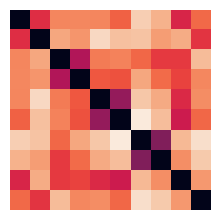

In [10]:
plt.grid("")
plt.axis("off")
plt.imshow(mat_euclidean)

Text(0.5, 0, 'Euclidean distance')

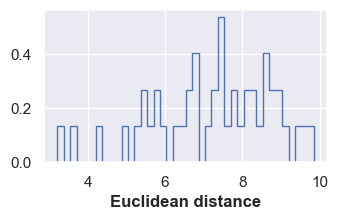

In [11]:
# Distribution of distances
distances_eucl = np.triu(mat_euclidean).reshape(-1)
distances_eucl = distances_eucl[distances_eucl != 0.0]
plt.hist(distances_eucl, histtype="step", bins=40, density=True);
plt.xlabel("Euclidean distance")

### Manhattan

In [12]:
mat_manhattan = cdist(np.stack(traces["std_phon_trace"]),np.stack(traces["std_phon_trace"]), metric="cityblock")

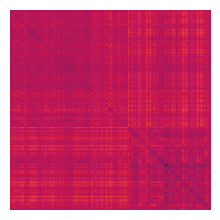

In [13]:
fig, ax = plt.subplots(figsize=default_style.SHORT_HALFSIZE_FIGURE)

plt.grid("")
plt.axis("off")
plt.imshow(mat_manhattan)

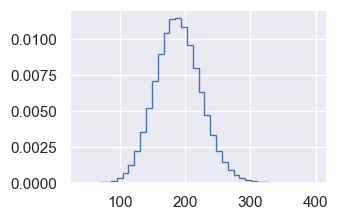

In [14]:
# Distribution of distances
fig, ax = plt.subplots(figsize=default_style.SHORT_HALFSIZE_FIGURE)

distances_man = np.triu(mat_manhattan).reshape(-1)
distances_man = distances_man[distances_man != 0.0]
plt.hist(distances_man, histtype="step", bins=40, density=True);

### DTW

In [15]:
from tslearn.metrics import cdist_dtw

mat_dtw = cdist_dtw(np.stack(traces["std_phon_trace"])[:10],np.stack(traces["std_phon_trace"])[:10], itakura_max_slope=2, n_jobs=-1)

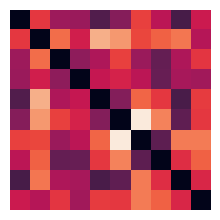

In [16]:
fig, ax = plt.subplots(figsize=default_style.SHORT_HALFSIZE_FIGURE)

plt.grid("")
plt.axis("off")
plt.imshow(mat_dtw)

## Kmeans

### Std phonetic (Euclidean)

In [17]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score, KernelKMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, adjusted_mutual_info_score as ami

In [18]:
X = np.stack(np.stack(traces["std_phon_trace"]))
print(np.stack(traces["std_phon_trace"]).shape)
print(X.shape)

(2452, 700)
(2452, 700)


C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.19781045229478944, 0.02574687154540115, 0.009776290349982284, 0.014490616000471253, -1.0469328917341495e-05, 0.01481197814570775, -0.00024336381589360373]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.17598735085171158, 0.03131600456038028, 0.020187187653061718, 0.05974548974174464, -0.0003038998124516061, 0.02186780908470538, -0.0001210394225052919]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15745164948271714, 0.032170718776259, 0.018377280211119413, 0.06161048282311559, -0.00044996588764030493, 0.033946596283138945, 7.964231899004e-05]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1643226251534649, 0.036957798654186635, 0.017034274027681047, 0.06127297263187327, -0.0003621333677283511, 0.04377278787771976, 0.0006573512170115295]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16310690304772227, 0.052006883786318715, 0.023468377052050664, 0.0615775252736064, -0.0007140236940507727, 0.045391089845832094, 0.00112695797083418]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1659567673108444, 0.05164353450629596, 0.024045110306050964, 0.05262270980506913, -0.0005367371009994477, 0.052757367343240054, 0.0022990160724911516]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16444309227028425, 0.05165158957174722, 0.020085768831705212, 0.05699949030661369, -0.0006412143628291631, 0.054670342327129445, 0.001756473999847907]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.14987537137446558, 0.0492771017994565, 0.020933660446719658, 0.06916653308375648, -0.000870830630918184, 0.05060607177747351, 0.00040520750875182977]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15930200304073053, 0.05315192842491002, 0.017038093788769557, 0.05316338463564299, -9.284658535678679e-05, 0.07078878226718184, 0.007168536256698061]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.17067635241572543, 0.05381268215768031, 0.016729220044297274, 0.05742588619318142, -0.0004767536291629352, 0.06526431239634058, 0.005480775576120227]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1562197307434298, 0.05653016493359192, 0.019439445639905115, 0.05872439485097422, -0.00048561918148764714, 0.07592641753748455, 0.004798656783006451]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.17178251738516812, 0.05371367136327174, 0.020765958370546185, 0.07232580934009729, -0.0005336218054765929, 0.08286461587459072, 0.008876082008738987]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16706864968640436, 0.056023657290495944, 0.020180740286691857, 0.07343923415132957, -0.0008192622145817133, 0.08953420901181623, 0.009149941352781302]



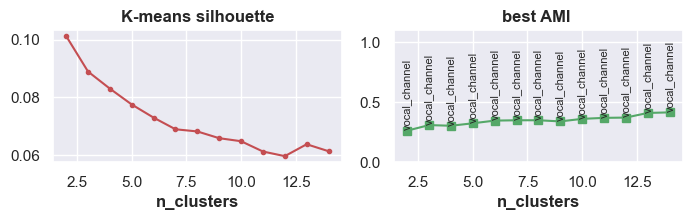

In [19]:
fig, axes = plt.subplot_mosaic([["sil", "ami"]], 
                              width_ratios=[1,  1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

sil_scores = []
amis = []
ns_clust = np.arange(2, 15)

for n in ns_clust:
    km = TimeSeriesKMeans(n_clusters=n, metric="euclidean", n_jobs=-1)
    km.fit(X)
    predictions = km.predict(X)
    sil_scores.append(silhouette_score(X, predictions, metric="euclidean", n_jobs=-1))
    
    ami_list = [ami(predictions, df[cat]) for cat in categorical_attributes]
    print(categorical_attributes)
    print(ami_list)
    print()
    amis.append(np.sum(ami_list))
    axes['ami'].annotate(f"{categorical_attributes[np.argmax(ami_list)]}",xy=(n, amis[-1]+0.02), ha="center", rotation=90, size=8)
    
axes["sil"].plot(ns_clust, sil_scores, label="silhouette", marker=".", color="r")
axes["ami"].plot(ns_clust, amis, label="sum AMI", marker="s", color="g")
axes["sil"].set_title('K-means silhouette')
axes["sil"].set_xlabel('n_clusters')
axes["ami"].set_title('best AMI ')
axes["ami"].set_xlabel('n_clusters')
axes['ami'].set_ylim(0, 1.1)
# axes['ami'].legend(loc="center", bbox_to_anchor=(0.6, 0.3))
fig.savefig("../images/ts_cluster_ami_sil_phon.pdf")

In [20]:
n_clusters = 6

km = TimeSeriesKMeans(n_clusters=n_clusters,
                      metric="euclidean",
                      verbose=False, 
                      n_jobs=-1)
km.fit_predict(X)

# fig, axes = plt.subplots(n_clusters,1,sharex=True, figsize=default_style.SHORT_FULLSIZE_FIGURE)

# for clus in range(n_clusters):
#     cluster_elements = X[km.labels_ == clus]
#     for i in range(5):
#         axes[clus].plot(cluster_elements[i], alpha=0.4, color="k")
#     axes[clus].set_yticks([])
#     axes[clus].plot(km.cluster_centers_[clus])
    
# df_ami = pd.DataFrame(columns=categorical_attributes)
# for cat in categorical_attributes:
#     print(cat, ami(km.labels_, df[cat]))
# plt.savefig("../images/ts_classification.pdf")

array([5, 2, 1, ..., 4, 3, 3], dtype=int64)

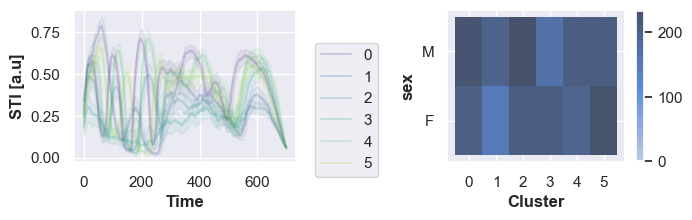

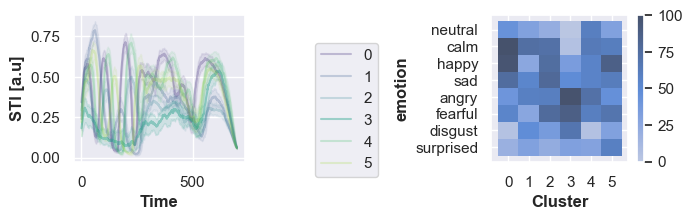

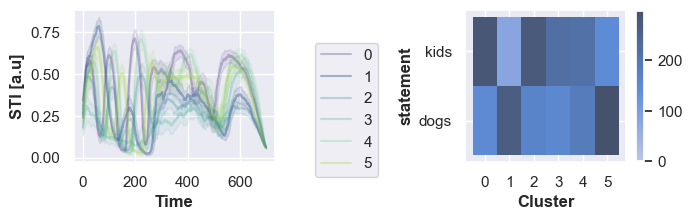

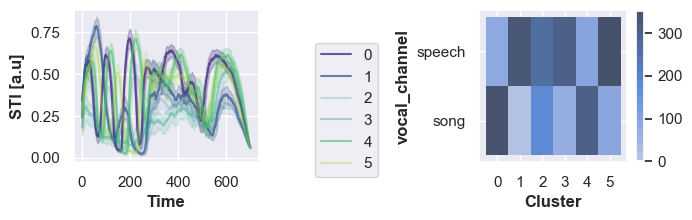

In [21]:
category = ['sex', 'emotion', 'statement', 'vocal_channel']

for cat in category:
    fig, axes = plt.subplot_mosaic([["t", "leg", "hist"]], 
                                  width_ratios=[1, 0.1, 1],  
                                  figsize=default_style.SHORT_FULLSIZE_FIGURE)

    colors=sns.color_palette("viridis", n_colors=n_clusters)

    for i in range(n_clusters):
        cluster_traces = np.where(km.labels_ == i)[0]

        alpha = min(5*np.abs(ami(km.labels_ == i, df[cat])) + 0.2, 1)

        low, mid, up = np.quantile(X[cluster_traces], [0.4, 0.5, 0.6], axis=0)
        axes["t"].plot(mid, color=colors[i], label=f"{i}", alpha=alpha)
        axes["t"].fill_between(np.arange(X.shape[1]),low, up, alpha=alpha/3, color=colors[i])

    sns.histplot(x=km.labels_.astype(int),bins=( list(np.arange(n_clusters+1) -0.01) ), 
                 y=df[cat],
                 cbar=True, cbar_kws=dict(shrink=.99))
    axes["hist"].set_xticks(np.arange(n_clusters)+0.5, labels=range(n_clusters));

    axes["t"].set_ylabel("STI [a.u]");
    axes["t"].set_xlabel("Time")
    fig.legend(loc="center", title="")

    axes["hist"].set_xlabel("Cluster")

    axes["leg"].axis("off")

    fig.savefig(f"../images/ts_cluster_counts_phon{cat}.pdf")

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

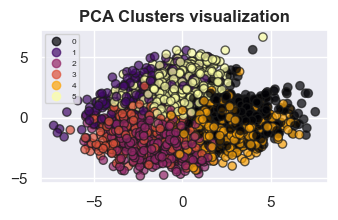

In [24]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='inferno', edgecolor='k'
             , alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(km.labels_)),fontsize="6")
plt.title('PCA Clusters visualization')
fig.savefig(f"../images/ts_cluster_pca_phon.pdf")
plt.show()

### Syllable_02 timeseries (euclidean)

In [25]:
X = traces["spectral_centroid"]
print(traces["spectral_centroid"].shape)
print(X.shape)

(2452, 54)
(2452, 54)


C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.02640842459574272, 0.028974779936964012, 0.03138132828490083, 0.0027448083499600493, -0.00013103305007375687, 0.11559993485757283, 0.2459052695375134]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.02198681540687777, 0.0539105320298845, 0.03881582305726299, 0.0009963594265193908, -0.00037235501781263553, 0.11880059721457469, 0.19663729515496703]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.018823662951652415, 0.058410787658270694, 0.028690468767895227, 0.17891551858226706, -0.00044462297927981776, 0.10560588019885853, 0.15308790525525193]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07601432644443927, 0.06640309035687461, 0.025713153998126393, 0.12936112644447242, -1.8271191567297576e-05, 0.10789493161667266, 0.12373434913110933]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.062260000149824954, 0.05657803361605352, 0.022361826286465707, 0.12068530906291842, -0.0006013828428273189, 0.14514709192717665, 0.1778684930616181]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07171461777983174, 0.06582899556642187, 0.02327224128475853, 0.1397507694647852, -0.00048618100451187305, 0.13474399788923536, 0.1469181489724945]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08612101041217339, 0.0618965684902088, 0.021807525647317694, 0.1369689284625972, -0.0007589688261943477, 0.15017031767815636, 0.16285056724081928]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.09452399995239982, 0.0612410762226425, 0.02468073120438009, 0.14829622905044973, -0.0008636313248506128, 0.14466082456683046, 0.1303238918101051]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.084749028077791, 0.05432847823443666, 0.02093392053413881, 0.16362633747754582, -0.0010528241410090364, 0.15209780973522652, 0.1508567208529061]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08319239498009276, 0.05959315190953719, 0.02354443935192293, 0.15807048538073132, -0.0009341811254648565, 0.1544834872419372, 0.14687928080691573]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08874669364985359, 0.06466111819033858, 0.023411585281154033, 0.15309829326206853, -0.0010175962644530267, 0.15343241761056353, 0.14437749752567494]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08393410280548201, 0.06838954539804667, 0.02161000766828813, 0.1749541333317958, -0.0006858391051077352, 0.15353500391222777, 0.1363433229969023]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.0806563825444121, 0.061891267134079636, 0.023873003405819056, 0.15240377007841663, -0.0010599717196847396, 0.15592952896095325, 0.1342205719734375]



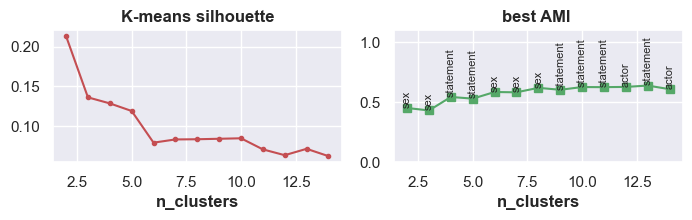

In [26]:
fig, axes = plt.subplot_mosaic([["sil", "ami"]], 
                              width_ratios=[1,  1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

sil_scores = []
amis = []
ns_clust = np.arange(2, 15)

for n in ns_clust:
    km = TimeSeriesKMeans(n_clusters=n, metric="euclidean", n_jobs=-1)
    km.fit(X)
    predictions = km.predict(X)
    sil_scores.append(silhouette_score(X, predictions, metric="euclidean", n_jobs=-1))
    
    ami_list = [ami(predictions, df[cat]) for cat in categorical_attributes]
    print(categorical_attributes)
    print(ami_list)
    print()
    amis.append(np.sum(ami_list))
    axes['ami'].annotate(f"{categorical_attributes[np.argmax(ami_list)]}",xy=(n, amis[-1]+0.02), ha="center", rotation=90, size=8)
    
axes["sil"].plot(ns_clust, sil_scores, label="silhouette", marker=".", color="r")
axes["ami"].plot(ns_clust, amis, label="sum AMI", marker="s", color="g")
axes["sil"].set_title('K-means silhouette')
axes["sil"].set_xlabel('n_clusters')
axes["ami"].set_title('best AMI ')
axes["ami"].set_xlabel('n_clusters')
axes['ami'].set_ylim(0, 1.1)
# axes['ami'].legend(loc="center", bbox_to_anchor=(0.6, 0.3))
fig.savefig("../images/ts_cluster_ami_sil_syll.pdf")

In [27]:
n_clusters = 5

km = TimeSeriesKMeans(n_clusters=n_clusters,
                      metric="euclidean",
                      verbose=False, 
                      n_jobs=-1)
km.fit_predict(X)

array([1, 1, 1, ..., 0, 2, 4], dtype=int64)

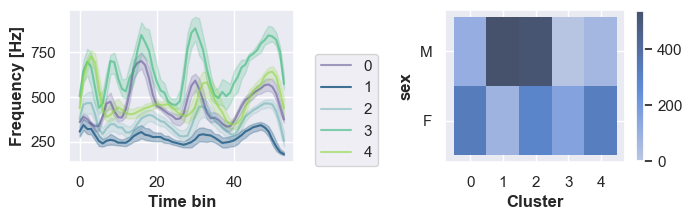

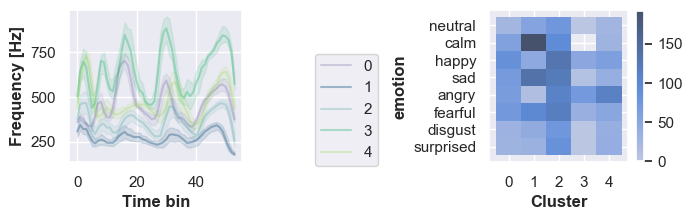

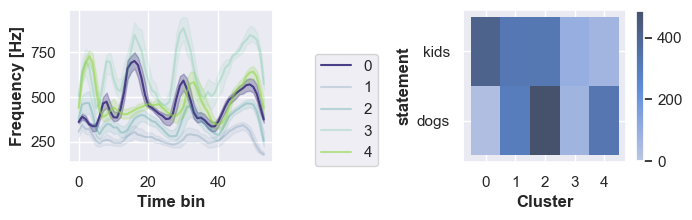

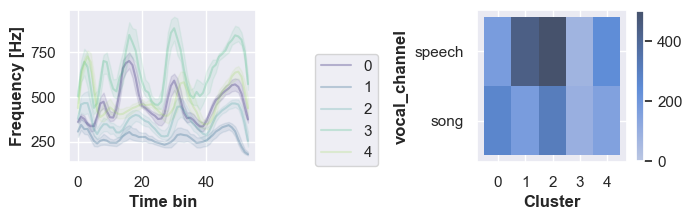

In [28]:
category = ['sex', 'emotion', 'statement', 'vocal_channel']

for cat in category:
    fig, axes = plt.subplot_mosaic([["t", "leg", "hist"]], 
                                  width_ratios=[1, 0.1, 1],  
                                  figsize=default_style.SHORT_FULLSIZE_FIGURE)

    colors=sns.color_palette("viridis", n_colors=n_clusters)

    for i in range(n_clusters):
        cluster_traces = np.where(km.labels_ == i)[0]

        alpha = min(5*np.abs(ami(km.labels_ == i, df[cat])) + 0.2, 1)

        low, mid, up = np.quantile(X[cluster_traces], [0.4, 0.5, 0.6], axis=0)
        axes["t"].plot(mid, color=colors[i], label=f"{i}", alpha=alpha)
        axes["t"].fill_between(np.arange(X.shape[1]),low, up, alpha=alpha/3, color=colors[i])

    sns.histplot(x=km.labels_.astype(int),bins=( list(np.arange(n_clusters+1) -0.01) ), 
                 y=df[cat],
                 cbar=True, cbar_kws=dict(shrink=.99))
    axes["hist"].set_xticks(np.arange(n_clusters)+0.5, labels=range(n_clusters));

    axes["t"].set_ylabel("Frequency [Hz]");
    axes["t"].set_xlabel("Time bin")
    fig.legend(loc="center", title="")

    axes["hist"].set_xlabel("Cluster")

    axes["leg"].axis("off")

    fig.savefig(f"../images/ts_cluster_counts_syll{cat}.pdf")

In [29]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

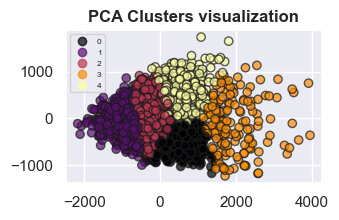

In [30]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='inferno', edgecolor='k'
             , alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(km.labels_)),fontsize="6")
plt.title('PCA Clusters visualization')
fig.savefig(f"../images/ts_cluster_pca_syll.pdf")
plt.show()

## Features clustering 

## phonetic

In [31]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from scipy.signal import find_peaks

In [32]:
X = np.stack(traces['std_phon_trace'])


In [33]:
def calculate_features(values):
    peaks = find_peaks(values, distance=3, prominence=[0.20,10])
    features = {
        'peaks':len(peaks[0]),
        'min': np.min(values),
        'max': np.max(values),
        'avg': np.mean(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '80p': np.percentile(values, 80),
        
    }

    return features

In [34]:
F = [list(calculate_features(x).values()) for x in X]

C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.20241228480410073, 0.02674713034164326, 0.009658836921921614, 0.015498187257063627, -5.6761517548310585e-05, 0.013532329601527433, -0.00019190534794109163]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.17478441486054017, 0.031376680097595436, 0.019879535252593786, 0.05981068087987293, -0.00028813320245531124, 0.02137691679250958, -0.00014210194922942821]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16455416776980838, 0.03086056726574849, 0.019137591350277018, 0.06166347878161144, -0.00023895593231865336, 0.033213682732970616, 0.00011515125538776852]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.17522655772428708, 0.03526486758300942, 0.0173593311875167, 0.0646382763362609, -0.00045200872696957585, 0.03447294171907526, 0.0002215957900862025]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.1736536389193197, 0.04146721100197158, 0.01785599502239569, 0.05872520925378143, -0.000157663865880617, 0.043269244838966076, 0.0007258401161455149]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15760101749698632, 0.05030158448685906, 0.021822084211326614, 0.05393589275236592, -0.0007454837707506132, 0.04823162258600434, 0.0017931739249804214]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15653836166302726, 0.05239772581323764, 0.019859388498032107, 0.057106692324161656, -0.0008470076105297908, 0.0531320953219976, 0.002526563757456029]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15849429368226503, 0.05322054910415365, 0.019294970703696332, 0.060577784627334326, -0.0006172995436891354, 0.059920709478013444, 0.002382238670544192]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15995874835086593, 0.05429805015979377, 0.019085096004301354, 0.05815211111012685, -0.00015352594340711724, 0.06849005872856785, 0.003295593994430055]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16613395081459997, 0.053769105026536035, 0.020451925328223104, 0.06857874163778753, -0.0008069442648701429, 0.0747659017815383, 0.003582548675743118]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16411440624377352, 0.050735903104248505, 0.01769817567117314, 0.058882492300921, -0.0004956775216283094, 0.08391124691950663, 0.008928081645790396]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.15656909586188475, 0.05766017947557699, 0.020664969326811826, 0.05079334036523949, -0.00035721512616743655, 0.08339282670069306, 0.005915523400946351]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.16718816438518333, 0.06087858706819096, 0.020792998767896764, 0.07864379661339914, -0.0009657042685719786, 0.08149119028553609, 0.004966101177565995]



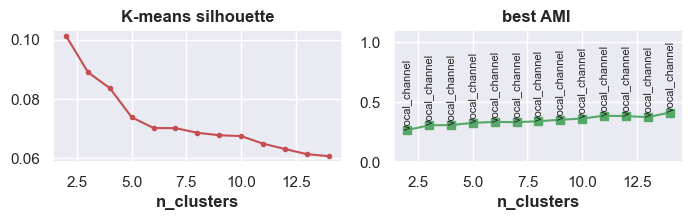

In [35]:
fig, axes = plt.subplot_mosaic([["sil", "ami"]], 
                              width_ratios=[1,  1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

sil_scores = []
amis = []
ns_clust = np.arange(2, 15)

for n in ns_clust:
    km = TimeSeriesKMeans(n_clusters=n, metric="euclidean", n_jobs=-1)
    km.fit(X)
    predictions = km.predict(X)
    sil_scores.append(silhouette_score(X, predictions, metric="euclidean", n_jobs=-1))
    
    ami_list = [ami(predictions, df[cat]) for cat in categorical_attributes]
    print(categorical_attributes)
    print(ami_list)
    print()
    amis.append(np.sum(ami_list))
    axes['ami'].annotate(f"{categorical_attributes[np.argmax(ami_list)]}",xy=(n, amis[-1]+0.02), ha="center", rotation=90, size=8)
    
axes["sil"].plot(ns_clust, sil_scores, label="silhouette", marker=".", color="r")
axes["ami"].plot(ns_clust, amis, label="sum AMI", marker="s", color="g")
axes["sil"].set_title('K-means silhouette')
axes["sil"].set_xlabel('n_clusters')
axes["ami"].set_title('best AMI ')
axes["ami"].set_xlabel('n_clusters')
axes['ami'].set_ylim(0, 1.1)
# axes['ami'].legend(loc="center", bbox_to_anchor=(0.6, 0.3))
fig.savefig("../images/ts_features_ami_sil_phon.pdf")

In [36]:
n_clusters = 5


km = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
km.fit(F)



KMeans(max_iter=100, n_clusters=5, n_init=10)

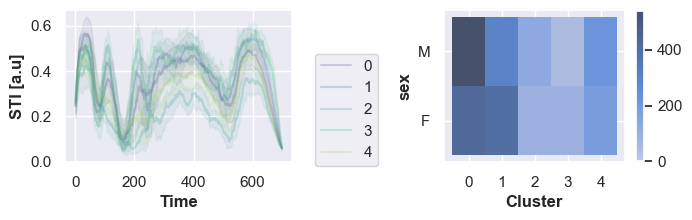

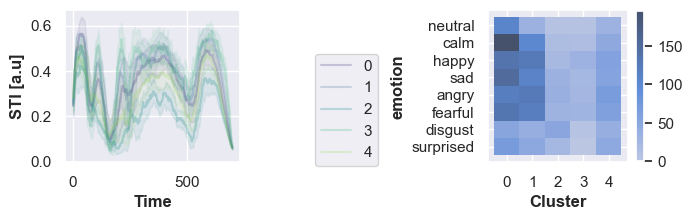

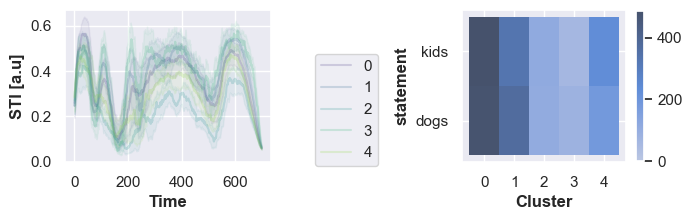

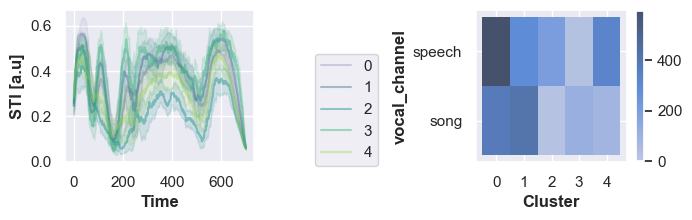

In [37]:
category = ['sex', 'emotion', 'statement', 'vocal_channel']

for cat in category:
    fig, axes = plt.subplot_mosaic([["t", "leg", "hist"]], 
                                  width_ratios=[1, 0.1, 1],  
                                  figsize=default_style.SHORT_FULLSIZE_FIGURE)

    colors=sns.color_palette("viridis", n_colors=n_clusters)

    for i in range(n_clusters):
        cluster_traces = np.where(km.labels_ == i)[0]

        alpha = min(5*np.abs(ami(km.labels_ == i, df[cat])) + 0.2, 1)

        low, mid, up = np.quantile(X[cluster_traces], [0.4, 0.5, 0.6], axis=0)
        axes["t"].plot(mid, color=colors[i], label=f"{i}", alpha=alpha)
        axes["t"].fill_between(np.arange(X.shape[1]),low, up, alpha=alpha/3, color=colors[i])

    sns.histplot(x=km.labels_.astype(int),bins=( list(np.arange(n_clusters+1) -0.01) ), 
                 y=df[cat],
                 cbar=True, cbar_kws=dict(shrink=.99))
    axes["hist"].set_xticks(np.arange(n_clusters)+0.5, labels=range(n_clusters));

    axes["t"].set_ylabel("STI [a.u]");
    axes["t"].set_xlabel("Time")
    fig.legend(loc="center", title="")

    axes["hist"].set_xlabel("Cluster")

    axes["leg"].axis("off")

    fig.savefig(f"../images/ts_features_counts_phon{cat}.pdf")

In [38]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

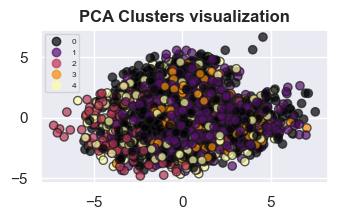

In [39]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='inferno', edgecolor='k'
             , alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(km.labels_)),fontsize="6")
plt.title('PCA Clusters visualization')
fig.savefig(f"../images/ts_features_pca_phon.pdf")
plt.show()

## Syllables_02

In [40]:
X = np.stack(traces['spectral_centroid'])

In [41]:
F = [list(calculate_features(x).values()) for x in X]

C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.02640842459574272, 0.028974779936964012, 0.03138132828490083, 0.0027448083499600493, -0.00013103305007375687, 0.11559993485757283, 0.2459052695375134]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.02198681540687777, 0.0539105320298845, 0.03881582305726299, 0.0009963594265193908, -0.00037235501781263553, 0.11880059721457469, 0.19663729515496703]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.03015702114600159, 0.05724144881411864, 0.029886915454469757, 0.12885592221519546, -0.00026950958044361496, 0.109032878131088, 0.15157479229552662]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.02047023771714547, 0.056254350137516056, 0.02614314850960478, 0.13125676260735708, -0.00044438552025728294, 0.12547067622308428, 0.157893257044088]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.04490403277914713, 0.06095651309912534, 0.025927703004155624, 0.1550058480302283, -0.0006564042912370959, 0.12468136084123126, 0.14211010780173614]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.06926036726999259, 0.06427553837817693, 0.02503117283117, 0.14006822342536565, -0.0007014465077746725, 0.12243865102975553, 0.1236406583350196]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07891367115902193, 0.05819143783136481, 0.021959115063342763, 0.13048564453121259, -0.0007064033223659115, 0.15062627256286784, 0.16329949440486036]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.09074880432872573, 0.06328441272333755, 0.021832112884935907, 0.1448054830062885, -0.000735033710126519, 0.13835819104455144, 0.132183543291661]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.07573640122457323, 0.06281700394341341, 0.023337278376052196, 0.1713271839693525, -0.0006532062893712684, 0.14084930810284954, 0.13717484826708856]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08693885516250355, 0.06457111521058696, 0.020465059176223974, 0.15058389410236098, -0.00118320224018177, 0.15382425469785166, 0.14492680955463597]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08600100185831691, 0.06960780126536288, 0.021826816803935604, 0.1426350140279915, -0.00115116081852705, 0.1511995576762818, 0.1353196924773802]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.09728057818416988, 0.06447672527529279, 0.02416474572195013, 0.13516521106106472, -0.0007223735547006749, 0.15867389909765034, 0.13915829521714848]



C:\Users\emanu\.virtualenvs\DM2-HUE9YkAX\Lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2452 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


['vocal_channel', 'emotion', 'emotional_intensity', 'statement', 'repetition', 'actor', 'sex']
[0.08510434167354994, 0.06710437176504548, 0.018973500321053483, 0.1538696442717983, -0.0006974279367246961, 0.16010934039079094, 0.13424213289545406]



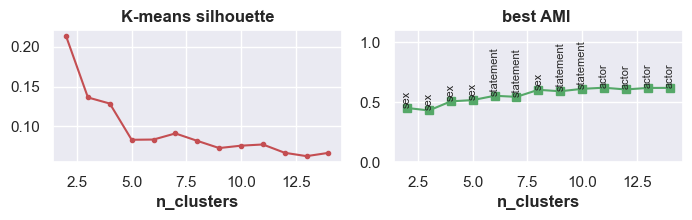

In [42]:
fig, axes = plt.subplot_mosaic([["sil", "ami"]], 
                              width_ratios=[1,  1],  
                              figsize=default_style.SHORT_FULLSIZE_FIGURE)

sil_scores = []
amis = []
ns_clust = np.arange(2, 15)

for n in ns_clust:
    km = TimeSeriesKMeans(n_clusters=n, metric="euclidean", n_jobs=-1)
    km.fit(X)
    predictions = km.predict(X)
    sil_scores.append(silhouette_score(X, predictions, metric="euclidean", n_jobs=-1))
    
    ami_list = [ami(predictions, df[cat]) for cat in categorical_attributes]
    print(categorical_attributes)
    print(ami_list)
    print()
    amis.append(np.sum(ami_list))
    axes['ami'].annotate(f"{categorical_attributes[np.argmax(ami_list)]}",xy=(n, amis[-1]+0.02), ha="center", rotation=90, size=8)
    
axes["sil"].plot(ns_clust, sil_scores, label="silhouette", marker=".", color="r")
axes["ami"].plot(ns_clust, amis, label="sum AMI", marker="s", color="g")
axes["sil"].set_title('K-means silhouette')
axes["sil"].set_xlabel('n_clusters')
axes["ami"].set_title('best AMI ')
axes["ami"].set_xlabel('n_clusters')
axes['ami'].set_ylim(0, 1.1)
# axes['ami'].legend(loc="center", bbox_to_anchor=(0.6, 0.3))
fig.savefig("../images/ts_features_ami_sil_syll.pdf")

In [43]:
n_clusters = 5


km = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
km.fit(F)

KMeans(max_iter=100, n_clusters=5, n_init=10)

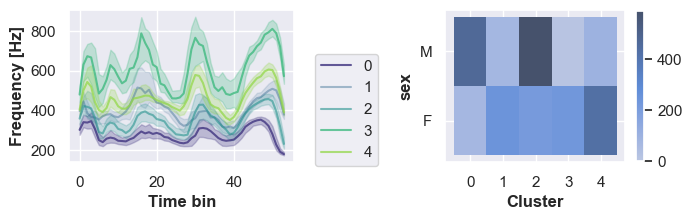

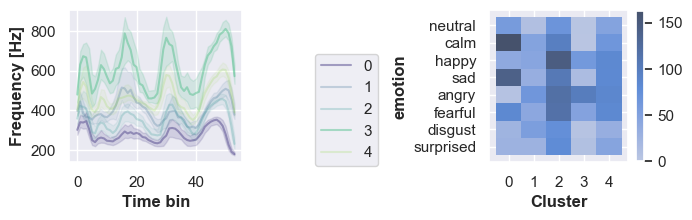

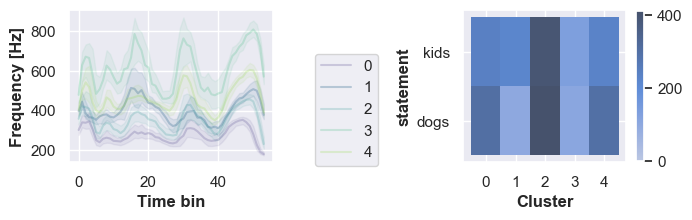

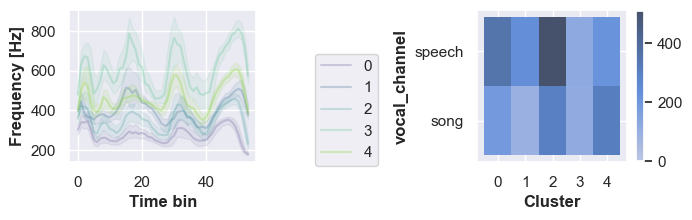

In [44]:
category = ['sex', 'emotion', 'statement', 'vocal_channel']

for cat in category:
    fig, axes = plt.subplot_mosaic([["t", "leg", "hist"]], 
                                  width_ratios=[1, 0.1, 1],  
                                  figsize=default_style.SHORT_FULLSIZE_FIGURE)

    colors=sns.color_palette("viridis", n_colors=n_clusters)

    for i in range(n_clusters):
        cluster_traces = np.where(km.labels_ == i)[0]

        alpha = min(5*np.abs(ami(km.labels_ == i, df[cat])) + 0.2, 1)

        low, mid, up = np.quantile(X[cluster_traces], [0.4, 0.5, 0.6], axis=0)
        axes["t"].plot(mid, color=colors[i], label=f"{i}", alpha=alpha)
        axes["t"].fill_between(np.arange(X.shape[1]),low, up, alpha=alpha/3, color=colors[i])

    sns.histplot(x=km.labels_.astype(int),bins=( list(np.arange(n_clusters+1) -0.01) ), 
                 y=df[cat],
                 cbar=True, cbar_kws=dict(shrink=.99))
    axes["hist"].set_xticks(np.arange(n_clusters)+0.5, labels=range(n_clusters));

    axes["t"].set_ylabel("Frequency [Hz]");
    axes["t"].set_xlabel("Time bin")
    fig.legend(loc="center", title="")

    axes["hist"].set_xlabel("Cluster")

    axes["leg"].axis("off")

    fig.savefig(f"../images/ts_features_counts_syll{cat}.pdf")

In [45]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

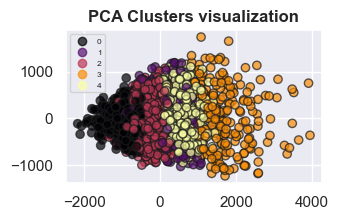

In [46]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_, cmap='inferno', edgecolor='k'
             , alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(km.labels_)),fontsize="6")
plt.title('PCA Clusters visualization')
fig.savefig(f"../images/ts_features_pca_syll.pdf")
plt.show()